# CODECLAUSE 

## Project-1 Fake News Detection

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df_news=pd.read_csv('news.csv')

In [92]:
df_news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [93]:
#renaming the index
df_news.rename(columns={'Unnamed: 0':'index'},inplace=True)
df_news

,index,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [94]:
#changing the index
df_news.set_index('index',inplace=True)

In [95]:
df_news

,title,text,label
index,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE


In [96]:
df_news.sort_index(ascending=True,inplace=True)
df_news

,title,text,label
index,,,
2,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL
3,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL
5,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL
6,"Despite Constant Debate, Americans' Abortion O...",It's been a big week for abortion news.\n\nCar...,REAL
7,Obama Argues Against Goverment Shutdown Over P...,President Barack Obama said Saturday night tha...,REAL
...,...,...,...
10549,French Political Leader: “France is about to E...,"Posted on October 31, 2016 by Theodore Shoebat...",FAKE
10551,Man with unfashionable front door feared by ne...,Man with unfashionable front door feared by ne...,FAKE
10553,Obamacare Architect on Rising Premiums: It’s N...,"Washington Free Beacon October 26, 2016 \nDr. ...",FAKE


In [97]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6335 entries, 2 to 10557
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 198.0+ KB


In [98]:
df_news[df_news.duplicated()].count()

title    29
text     29
label    29
dtype: int64

In [99]:
#dropping duplicate entries
df_news.drop_duplicates(inplace=True)

In [100]:
#dropping the 'title' feature as we will only be working with 'text' of the messages
df_news.drop('title',axis=1,inplace=True)


In [101]:
# Convert to lowercase

df_news['text'] = df_news['text'].apply(lambda x: x.lower())
df_news.head()


,text,label
index,,
2,ever since texas laws closed about half of the...,REAL
3,"donald trump and hillary clinton, now at the s...",REAL
5,washington -- forty-three years after the supr...,REAL
6,it's been a big week for abortion news.\n\ncar...,REAL
7,president barack obama said saturday night tha...,REAL


In [102]:
#dropping punctuations using string module
import string

def punctuation_removal(text):
    rem_words = [x for x in text if x not in string.punctuation]
    rem_punc = ''.join(rem_words)
    return rem_punc

df_news['text'] = df_news['text'].apply(punctuation_removal)

In [103]:
df_news.head()

,text,label
index,,
2,ever since texas laws closed about half of the...,REAL
3,donald trump and hillary clinton now at the st...,REAL
5,washington fortythree years after the supreme...,REAL
6,its been a big week for abortion news\n\ncarly...,REAL
7,president barack obama said saturday night tha...,REAL


In [104]:
#dropping english stopwords using nltk library 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword = stopwords.words('english')

df_news['text'] = df_news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopword)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
df_news.head()

,text,label
index,,
2,ever since texas laws closed half states abort...,REAL
3,donald trump hillary clinton starting line gen...,REAL
5,washington fortythree years supreme court esta...,REAL
6,big week abortion news carly fiorinas passiona...,REAL
7,president barack obama said saturday night con...,REAL


REAL    3154
FAKE    3152
Name: label, dtype: int64


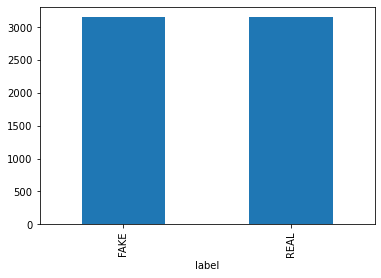

In [106]:
#counting the fake and real news in our dataset
print(df_news.label.value_counts())
df_news.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

### Entries of both real and fake are almost equal implying the dataset is not skewed.

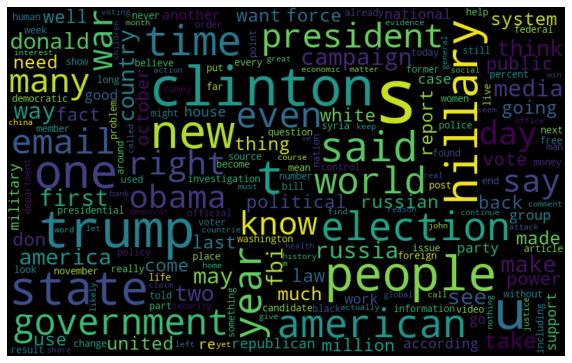

In [107]:
# Word cloud for fake news

from wordcloud import WordCloud

fake_df_news = df_news[df_news["label"] == "FAKE"]
all_words = ' '.join([text for text in fake_df_news.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

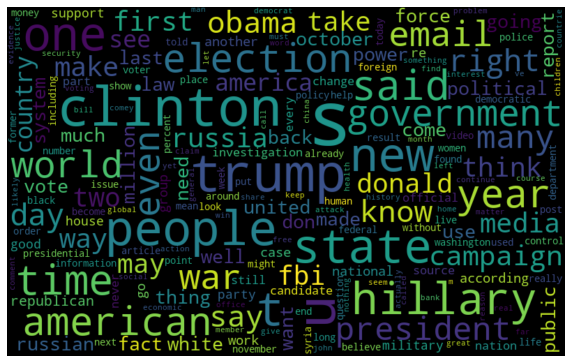

In [108]:
real_df_news = df_news[df_news["label"] == "TRUE"]
all_words = ' '.join([text for text in fake_df_news.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Training and testing the model

In [109]:
#importing necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [128]:
#Applying train test split on the model
X_train,X_test,y_train,y_test = train_test_split(df_news['text'], df_news.label, test_size=0.2, random_state=42)

In [114]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


## Following are the models on which we will be training and testing our dataset and choose the best among them. The methods are Decision Tree classifier, Support Vector Classifer, Random forest Classifier, K- Neighbors Classifier, Stocastic Gradient Descent Classifier

In [115]:
dct = DecisionTreeClassifier(random_state = 42)
svc = SVC(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
logreg = LogisticRegression(random_state = 42)
knn = KNeighborsClassifier()
sgd = SGDClassifier()

In [117]:
classifiers = [
    ("knn" , knn),
    ("rf" , rf),
    ("logreg" , logreg),
    ("svc", svc),
    ("sgd",sgd),
    ("dct",dct)
]


In [121]:
for clf_name, clf in classifiers:
    
    # Fit clf to the training set
    pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])
# Fitting the model
    model = pipe.fit(X_train, y_train)

# Accuracy
    prediction = model.predict(X_test)
    print("accuracy: {}% using {} ".format(round(accuracy_score(y_test, prediction)*100,2),clf_name))
    

['FAKE' 'FAKE' 'FAKE' ... 'FAKE' 'FAKE' 'FAKE']
accuracy: 55.31% using knn 
['REAL' 'FAKE' 'REAL' ... 'FAKE' 'REAL' 'REAL']
accuracy: 91.28% using rf 
['REAL' 'FAKE' 'REAL' ... 'FAKE' 'REAL' 'FAKE']
accuracy: 90.89% using logreg 
['REAL' 'FAKE' 'REAL' ... 'FAKE' 'REAL' 'FAKE']
accuracy: 92.79% using svc 
['REAL' 'REAL' 'REAL' ... 'FAKE' 'REAL' 'FAKE']
accuracy: 93.74% using sgd 
['REAL' 'FAKE' 'REAL' ... 'FAKE' 'FAKE' 'FAKE']
accuracy: 81.77% using dct 


## Stocastic Gradient Descent(SGD) Classifier gives 93.7% accuracy so we use it as our train-test model to fit our dataset and predict

#### The purpose of the pipeline is to assemble several steps that can becross-validated together while setting different parameters. 
####  Countvectorizer is a method to convert text to numerical data. To show you how it works let’s take an example:

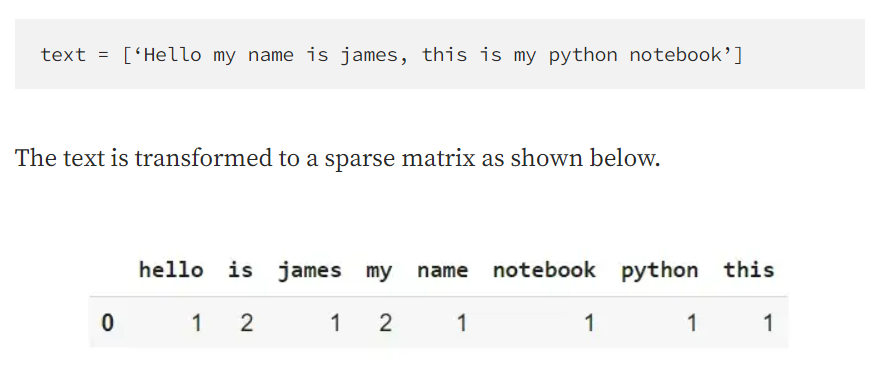

### TfidfTransformer is used to transform a count matrix to a normalised tf-idf matrix

   ##### 1 Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification.
   ##### 2 The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

In [130]:
# Vectorizing and applying TF-IDF

# Fitting the model
model = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())]).fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print(prediction)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


['REAL' 'REAL' 'REAL' ... 'FAKE' 'REAL' 'FAKE']
accuracy: 93.82%


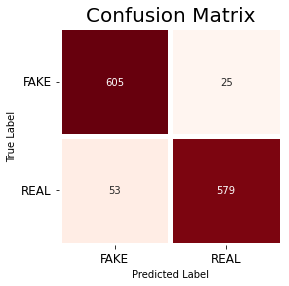

In [132]:
cm = confusion_matrix(y_test, prediction)

df1 = pd.DataFrame(columns=["FAKE","REAL"], index= ["FAKE","REAL"], data= cm )

f,ax = plt.subplots(figsize=(4,4))

sns.heatmap(df1, annot=True,cmap="Reds", fmt= '.0f',ax=ax,linewidths = 5, cbar = False)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 20)
plt.show()